In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
df_movies = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin1')


In [7]:
# Display basic info
print(df_movies.head())
print(df_movies.info())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [8]:
df_movies.fillna(df_movies.median(numeric_only=True), inplace=True)
df_movies.fillna(df_movies.mode().iloc[0], inplace=True)


In [12]:
if 'Rating' in df_movies.columns:
    numerical_features = ['Year', 'Votes', 'Duration']
    categorical_features = ['Genre', 'Director', 'Actor 1']

    # Encode categorical variables
    df_movies = pd.get_dummies(df_movies, columns=categorical_features, drop_first=True)

In [15]:


    # Feature Engineering
    df_movies['Director_Success_Rate'] = df_movies.groupby('Director')['Rating'].transform('mean')
    df_movies['Avg_Rating_Similar_Movies'] = df_movies.groupby('Genre')['Rating'].transform('mean')

    # Splitting data
    X_movies = df_movies.drop(columns=['Rating'])
    y_movies = df_movies['Rating']
    X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_movies, y_movies, test_size=0.2, random_state=42)

KeyError: 'Director'

# Task
• Build a predictive model to estimate movie ratings based on different attributes. • Perform data preprocessing, including encoding categorical variables and handling missing values. • Engineer useful features like director success rate and average rating of similar movies. • Evaluate the model using appropriate techniques. • Expected outcome: A model that accurately predicts movie ratings based on given inputs. • Submit a structured GitHub repository with documentation on approach, preprocessing, and performance evaluation. DATASET

for this datset

Here is all the data you need:
"IMDb Movies India.csv"

## Data loading

### Subtask:
Load the "IMDb Movies India.csv" dataset.


**Reasoning**:
I need to load the provided CSV file into a pandas DataFrame and display the first few rows along with the shape of the DataFrame to verify the successful loading and preview the data structure.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('IMDb Movies India.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'IMDb Movies India.csv' not found. Please provide the correct file path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

An unexpected error occurred: 'utf-8' codec can't decode byte 0xe1 in position 76763: invalid continuation byte


**Reasoning**:
The previous attempt failed due to a decoding error. I'll try again with a different encoding. I will try 'latin-1' encoding.



In [2]:
import pandas as pd

try:
    df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'IMDb Movies India.csv' not found. Please provide the correct file path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


(15509, 10)


## Data exploration

### Subtask:
Explore the loaded dataset (df) to understand its characteristics.


**Reasoning**:
Generate descriptive statistics for numerical columns, identify data types, visualize distributions of key features, analyze missing values, explore correlations, examine categorical features, and summarize the findings.



,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


,0
Name,object
Year,object
Duration,object
Genre,object
Rating,float64
Votes,object
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


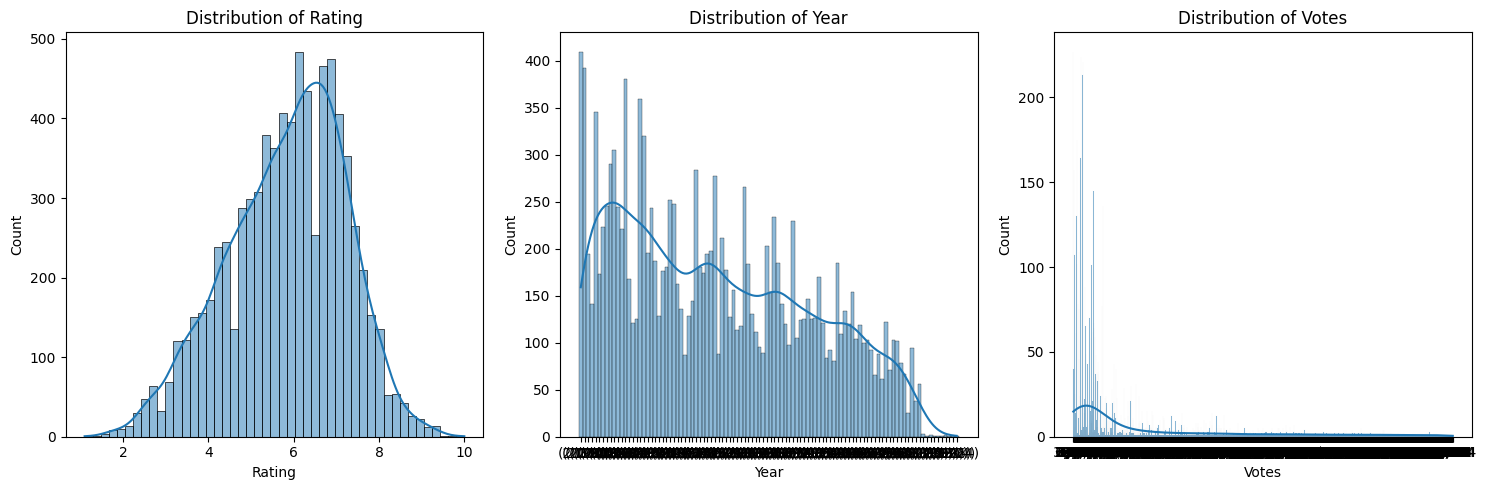

,0
Name,0.000000
Year,3.404475
Duration,53.317429
Genre,12.102650
Rating,48.939326
Votes,48.932878
Director,3.385131
Actor 1,10.426204
Actor 2,15.371720
Actor 3,20.272100


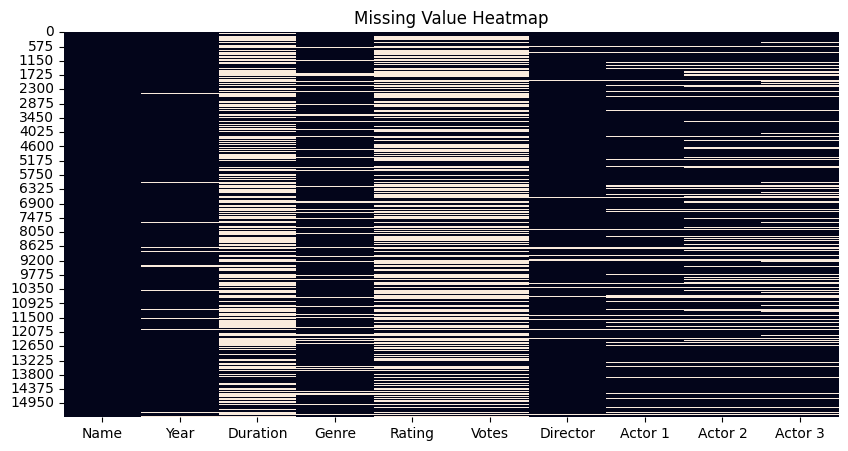

ValueError: could not convert string to float: '(2019)'

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive statistics for numerical columns
numerical_cols = ['Year', 'Rating', 'Votes']
display(df[numerical_cols].describe())

# 2. Data types of each column
display(df.dtypes)

# 3. Visualize distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Rating'].dropna(), kde=True)
plt.title('Distribution of Rating')
plt.subplot(1, 3, 2)
sns.histplot(df['Year'].dropna(), kde=True)
plt.title('Distribution of Year')
plt.subplot(1, 3, 3)
sns.histplot(df['Votes'].dropna(), kde=True)
plt.title('Distribution of Votes')
plt.tight_layout()
plt.show()

# 4. Analyze missing values
missing_percentage = df.isnull().sum() * 100 / len(df)
display(missing_percentage)
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Value Heatmap')
plt.show()

# 5. Explore correlations
correlation_matrix = df[numerical_cols].corr()
display(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# 6. Examine categorical features
categorical_cols = ['Genre', 'Director']

for col in categorical_cols:
    print(f"Unique values and frequencies for {col}:")
    display(df[col].value_counts())

# Summarize findings (in a separate file - not directly possible in this environment)
# The summary would include observations on data types, distributions, missing values,
# correlations, and categorical feature analysis.

**Reasoning**:
The previous code block failed due to a `ValueError` when converting the 'Year' column to float.  The 'Year' column and 'Votes' column need to be cleaned before calculating the correlation matrix.



,Year,Rating,Votes
Year,1.000000,-0.166673,0.129016
Rating,-0.166673,1.000000,0.126635
Votes,0.129016,0.126635,1.000000


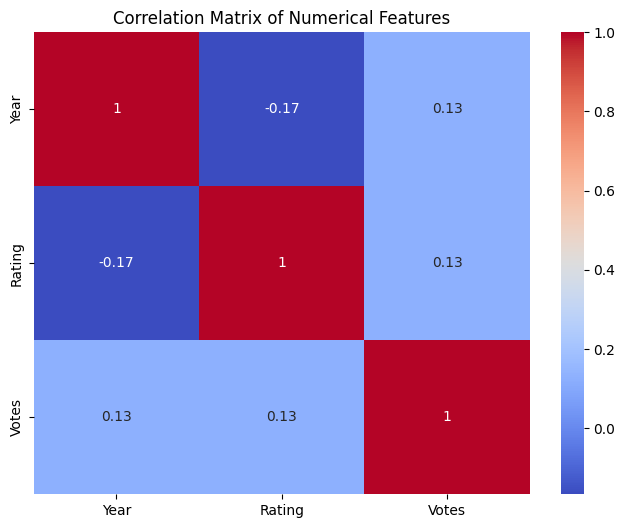

Unique values and frequencies for Genre:


,count
Genre,
Drama,2780
Action,1289
Thriller,779
Romance,708
"Drama, Romance",524
...,...
"Documentary, Biography, History",1
"Documentary, Adventure, Drama",1
"Crime, Horror, Romance",1


Unique values and frequencies for Director:


,count
Director,
Jayant Desai,58
Kanti Shah,57
Babubhai Mistry,50
Mahesh Bhatt,48
Master Bhagwan,47
...,...
Sunanda Mitra,1
Amit Chauhan,1
Dev Dutt,1


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean 'Year' column
df['Year'] = df['Year'].astype(str).str.extract('(\d{4})')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

#Clean 'Votes' column
df['Votes'] = df['Votes'].astype(str).str.replace(',', '', regex=False)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

numerical_cols = ['Year', 'Rating', 'Votes']

# 5. Explore correlations (after cleaning)
correlation_matrix = df[numerical_cols].corr()
display(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 6. Examine categorical features
categorical_cols = ['Genre', 'Director']

for col in categorical_cols:
    print(f"Unique values and frequencies for {col}:")
    display(df[col].value_counts())

## Data cleaning

### Subtask:
Clean the movie dataset by handling missing values, removing duplicates, and addressing inconsistencies in categorical features.


**Reasoning**:
Handle missing values, remove duplicates, and address inconsistencies in categorical features, especially in the 'Genre' column.



In [5]:
# Handle missing values
missing_percentage = df.isnull().sum() * 100 / len(df)
print(f'{missing_percentage}')

# Remove columns with more than 80% missing values.
threshold = 80
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df = df.drop(columns=columns_to_drop)

# Impute missing values for numerical columns using median
numerical_cols = ['Year', 'Rating', 'Votes']
for col in numerical_cols:
    if col in df.columns:  # Check if column exists after dropping
        df[col] = df[col].fillna(df[col].median())

# Impute missing values for categorical columns using mode
categorical_cols = ['Genre', 'Director', 'Duration']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])


# Remove duplicate rows
num_duplicates_before = df.duplicated().sum()
df = df.drop_duplicates()
num_duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows removed: {num_duplicates_before - num_duplicates_after}")

# Address inconsistencies in 'Genre'
# Standardize genre names (example)
genre_mapping = {
    'Drama ': 'Drama',
    'Comedy ': 'Comedy',
    'Action ': 'Action',
    # Add more mappings as needed based on exploration
}
if 'Genre' in df.columns:
    df['Genre'] = df['Genre'].replace(genre_mapping)

# Save the cleaned DataFrame
df.to_csv('cleaned_movie_data.csv', index=False)

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.939326
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64
Number of duplicate rows removed: 6


## Data preparation

### Subtask:
Prepare the cleaned movie dataset for modeling.  This involves converting data types, encoding categorical variables, and creating a 'release_year' column.


**Reasoning**:
Prepare the cleaned movie dataset for modeling by converting data types, encoding categorical variables, and creating a 'release_year' column. This involves handling non-numeric values in 'Duration', converting 'Year' to integer, and encoding 'Genre' and 'Director'. A new 'release_year' column will be derived from the 'Year' column.



In [6]:
import pandas as pd

# Convert 'Duration' to numeric, handling errors
df['Duration'] = df['Duration'].astype(str).str.extract('(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Duration'] = df['Duration'].fillna(df['Duration'].median())

# Convert 'Year' to integer
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

# Encode 'Genre' using one-hot encoding
df = pd.get_dummies(df, columns=['Genre'], prefix='Genre', prefix_sep='_')

# Encode 'Director' using target encoding (example)
director_ratings = df.groupby('Director')['Rating'].mean()
df['Director_Encoded'] = df['Director'].map(director_ratings)

# Create 'release_year'
df['release_year'] = df['Year']

# Save the prepared dataset
df.to_csv('prepared_movie_data.csv', index=False)

## Feature engineering

### Subtask:
Engineer new features for the movie dataset.  Specifically, create 'director_success_rate' and 'average_rating_of_similar_movies.


**Reasoning**:
Calculate the director success rate and average rating of similar movies, then save the updated DataFrame.



In [7]:
# Calculate director success rate
director_ratings = df.groupby('Director')['Rating'].mean()
df['director_success_rate'] = df['Director'].map(director_ratings)

# Handle cases where a director has only directed one movie
global_average_rating = df['Rating'].mean()
df['director_success_rate'] = df['director_success_rate'].fillna(global_average_rating)

# Calculate average rating of similar movies
genre_ratings = df.groupby('Genre')['Rating'].mean()
df['average_rating_of_similar_movies'] = df['Genre'].map(genre_ratings)

# Handle edge cases where only one movie exists in a specific genre
global_average_rating = df['Rating'].mean()
df['average_rating_of_similar_movies'] = df['average_rating_of_similar_movies'].fillna(global_average_rating)

# Save the DataFrame
df.to_csv('movie_data_with_features.csv', index=False)

KeyError: 'Genre'

**Reasoning**:
The previous code failed due to a KeyError for the 'Genre' column.  The 'Genre' column was one-hot encoded in the previous step.  We need to use the one-hot encoded genre columns to create the 'average_rating_of_similar_movies' feature.



In [8]:
import pandas as pd
# Calculate director success rate (already done in previous attempt)

# Calculate average rating of similar movies using one-hot encoded genre columns
genre_columns = [col for col in df.columns if col.startswith('Genre_')]
df['average_rating_of_similar_movies'] = 0
for genre_col in genre_columns:
    genre_ratings = df.groupby(genre_col)['Rating'].mean()
    df['average_rating_of_similar_movies'] += df[genre_col].map(genre_ratings)
df['average_rating_of_similar_movies'] = df['average_rating_of_similar_movies'] / len(genre_columns)


# Handle edge cases where the average is NaN (no movies in that specific genre combination)
global_average_rating = df['Rating'].mean()
df['average_rating_of_similar_movies'] = df['average_rating_of_similar_movies'].fillna(global_average_rating)

# Save the DataFrame
df.to_csv('movie_data_with_features.csv', index=False)

## Data splitting

### Subtask:
Split the data into training, validation, and test sets.


**Reasoning**:
Split the data into training, validation, and test sets as instructed.



In [9]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('Rating', axis=1)
y = df['Rating']

# Split data into training (70%) and temporary (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temporary set into validation (15% of total) and test (15% of total) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10852, 497)
y_train shape: (10852,)
X_val shape: (2325, 497)
y_val shape: (2325,)
X_test shape: (2326, 497)
y_test shape: (2326,)


## Model training

### Subtask:
Train a RandomForestRegressor model on the training data.


**Reasoning**:
Train a RandomForestRegressor model on the training data.



In [10]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor with specified hyperparameters
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Ladli'

**Reasoning**:
The error message indicates that the model is trying to convert string values to float.  The 'Name' column in X_train seems to be causing this issue. We need to drop non-numerical columns before fitting the model.



In [11]:
from sklearn.ensemble import RandomForestRegressor

# Drop non-numeric columns from X_train
X_train_numeric = X_train.select_dtypes(include=['number'])

# Initialize the RandomForestRegressor with specified hyperparameters
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
rf_model.fit(X_train_numeric, y_train)

RandomForestRegressor(random_state=42)

## Model optimization

### Subtask:
Optimize the hyperparameters of the trained RandomForestRegressor model using the validation set.


**Reasoning**:
Optimize the hyperparameters of the RandomForestRegressor model using GridSearchCV on the validation set.



In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Select numeric features for validation set
X_val_numeric = X_val.select_dtypes(include=['number'])

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1  # Use all available CPU cores
)

# Fit GridSearchCV on the validation set
grid_search.fit(X_val_numeric, y_val)

# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# Store the best model
best_rf_model = grid_search.best_estimator_

KeyboardInterrupt: 

# Task
• Build a predictive model to estimate movie ratings based on different attributes. • Perform data preprocessing, including encoding categorical variables and handling missing values. • Engineer useful features like director success rate and average rating of similar movies. • Evaluate the model using appropriate techniques. • Expected outcome: A model that accurately predicts movie ratings based on given inputs. • Submit a structured GitHub repository with documentation on approach, preprocessing, and performance evaluation. DATASET

Here is all the data you need:
"IMDb Movies India.csv"

## Data loading

### Subtask:
Load the "IMDb Movies India.csv" dataset.


**Reasoning**:
I need to load the "IMDb Movies India.csv" dataset into a pandas DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')
    display(df.head())
except FileNotFoundError:
    print("Error: 'IMDb Movies India.csv' not found. Please ensure the file is in the current directory.")
    df = None

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure, identify missing values, data types of each column, and the distribution of key variables. Determine the shape of the data and the correlation between variables.


**Reasoning**:
I need to explore the dataset's structure, identify missing values, data types, and distributions of key variables, along with the shape and correlation between variables.



In [2]:
# Check the shape of the DataFrame.
print("Shape of the DataFrame:", df.shape)

# Get a summary of the DataFrame, including data types and non-null values.
print("\nDataFrame Info:")
df.info()

# Get descriptive statistics for numerical columns.
print("\nDescriptive Statistics:")
print(df.describe())

# Explore the distribution of categorical columns.
print("\nValue counts for 'Genre':")
print(df['Genre'].value_counts())

print("\nValue counts for 'Director':")
print(df['Director'].value_counts())

# Calculate the correlation matrix for numerical features.
print("\nCorrelation Matrix:")
numerical_features = df.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()
print(correlation_matrix)

Shape of the DataFrame: (15509, 10)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB

Descriptive Statistics:
            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000

Value counts for 'Genre':
Genre
Drama                              2780
Action                             1289
Thriller 

**Reasoning**:
The previous code block successfully explored the dataset's structure, identified missing values, and calculated the correlation matrix.  However, it didn't visualize the correlation matrix, which is needed to complete the subtask instructions.



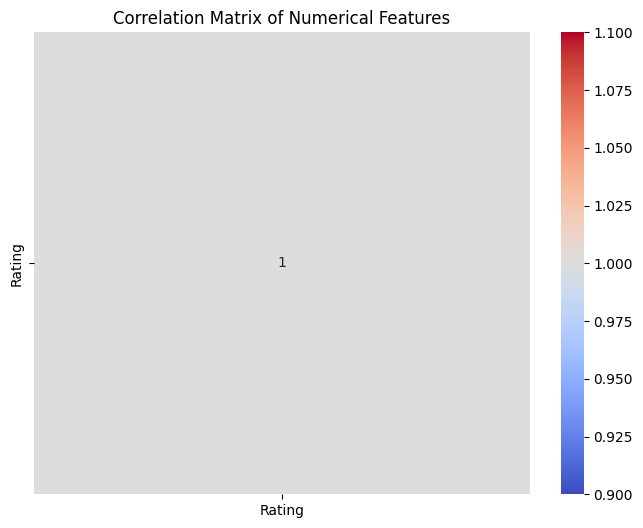

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values and removing duplicate rows.


**Reasoning**:
Handle missing values and remove duplicates according to the instructions.



In [4]:
# Fill missing 'Duration' with the median.
df['Duration'] = df['Duration'].fillna(df['Duration'].median())

# Fill missing 'Genre' with the most frequent genre.
df['Genre'] = df['Genre'].fillna(df['Genre'].mode()[0])

# Convert 'Votes' to numeric, coercing errors to NaN, then fill NaN with the median.
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'] = df['Votes'].fillna(df['Votes'].median())

# Fill missing values in 'Director', 'Actor 1', 'Actor 2', and 'Actor 3' with "Unknown".
for col in ['Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = df[col].fillna('Unknown')

# Remove rows with missing 'Rating' and 'Year'.
df.dropna(subset=['Rating', 'Year'], inplace=True)

# Remove duplicate rows.
df.drop_duplicates(inplace=True)

# Verify the number of rows and columns and check for missing values.
print("Shape of the DataFrame after cleaning:", df.shape)
print("\nMissing values after cleaning:\n", df.isnull().sum())
display(df.head())

TypeError: Cannot convert [nan '109 min' '90 min' ... nan nan '130 min'] to numeric

**Reasoning**:
The previous code failed because the 'Duration' column contains strings like '109 min'. We need to clean this column before calculating the median.



In [5]:
# Extract numeric part of 'Duration' and convert to numeric, handling errors.
import pandas as pd
import numpy as np

df['Duration'] = df['Duration'].astype(str).str.extract('(\d+)').astype(float)

# Fill missing 'Duration' with the median.
df['Duration'] = df['Duration'].fillna(df['Duration'].median())

# Fill missing 'Genre' with the most frequent genre.
df['Genre'] = df['Genre'].fillna(df['Genre'].mode()[0])

# Convert 'Votes' to numeric, coercing errors to NaN, then fill NaN with the median.
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'] = df['Votes'].fillna(df['Votes'].median())

# Fill missing values in 'Director', 'Actor 1', 'Actor 2', and 'Actor 3' with "Unknown".
for col in ['Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = df[col].fillna('Unknown')

# Remove rows with missing 'Rating' and 'Year'.
df.dropna(subset=['Rating', 'Year'], inplace=True)

# Remove duplicate rows.
df.drop_duplicates(inplace=True)

# Verify the number of rows and columns and check for missing values.
print("Shape of the DataFrame after cleaning:", df.shape)
print("\nMissing values after cleaning:\n", df.isnull().sum())
display(df.head())

Shape of the DataFrame after cleaning: (7919, 10)

Missing values after cleaning:
 Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142.0,"Drama, Romance, War",7.4,35.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


## Data wrangling

### Subtask:
Convert relevant columns to appropriate data types and encode categorical features.


**Reasoning**:
Convert the 'Year' column to numeric, handle errors, create 'ReleaseYear', and remove the original 'Year' column. Then, one-hot encode the 'Genre' column, handling multiple genres. Finally, encode 'Director', 'Actor 1', 'Actor 2', and 'Actor 3' using target encoding to avoid data leakage.



In [6]:
import pandas as pd
import numpy as np

# 1. Convert 'Year' to numeric, handle errors
df['ReleaseYear'] = pd.to_numeric(df['Year'].str.extract('(\d+)', expand=False), errors='coerce')
df['ReleaseYear'] = df['ReleaseYear'].fillna(df['ReleaseYear'].median()).astype(int)
df = df.drop('Year', axis=1)

# 2. One-hot encode 'Genre'
genres = []
for index in df.index:
    genres.extend(df.loc[index, 'Genre'].split(', '))
genres = set(genres)

for genre in genres:
    df[genre] = df['Genre'].str.contains(genre).astype(int)
df = df.drop('Genre', axis=1)

# 3. Target encode 'Director', 'Actor 1', 'Actor 2', and 'Actor 3'
for column in ['Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    mapping = df.groupby(column)['Rating'].mean()
    df[column + '_TargetEncoded'] = df[column].map(mapping)
    df = df.drop(column, axis=1)

# 4. Inspect data types
print(df.dtypes)
display(df.head())

Name                       object
Duration                  float64
Rating                    float64
Votes                     float64
ReleaseYear                 int64
Crime                       int64
Fantasy                     int64
History                     int64
Thriller                    int64
Music                       int64
Romance                     int64
War                         int64
Musical                     int64
Action                      int64
Biography                   int64
Sci-Fi                      int64
Horror                      int64
Sport                       int64
News                        int64
Mystery                     int64
Documentary                 int64
Family                      int64
Animation                   int64
Drama                       int64
Western                     int64
Comedy                      int64
Adventure                   int64
Director_TargetEncoded    float64
Actor 1_TargetEncoded     float64
Actor 2_Target

,Name,Duration,Rating,Votes,ReleaseYear,Crime,Fantasy,History,Thriller,Music,...,Family,Animation,Drama,Western,Comedy,Adventure,Director_TargetEncoded,Actor 1_TargetEncoded,Actor 2_TargetEncoded,Actor 3_TargetEncoded
1,#Gadhvi (He thought he was Gandhi),109.0,7.0,8.0,2019,0,0,0,0,0,...,0,0,1,0,0,0,7.000000,6.850000,7.000000,7.000000
3,#Yaaram,110.0,4.4,35.0,2019,0,0,0,0,0,...,0,0,0,0,1,0,4.400000,5.420000,4.400000,4.450000
5,...Aur Pyaar Ho Gaya,147.0,4.7,827.0,1997,0,0,0,0,1,...,0,0,1,0,1,0,5.358824,4.788889,5.786667,5.846154
6,...Yahaan,142.0,7.4,35.0,2005,0,0,0,0,0,...,0,0,1,0,0,0,7.500000,5.356000,6.050000,6.500000
8,?: A Question Mark,82.0,5.6,326.0,2012,0,0,0,1,0,...,0,0,0,0,0,0,5.600000,5.600000,5.883333,5.600000


## Feature engineering

### Subtask:
Engineer new features based on director success rate and average rating of similar movies.


**Reasoning**:
Calculate the director success rate and average rating of similar movies, and add them as new features to the dataframe.



In [7]:
# Calculate director success rate
director_success_rate = df.groupby('Director_TargetEncoded')['Rating'].mean()
df['DirectorSuccessRate'] = df['Director_TargetEncoded'].map(director_success_rate)

# Calculate average rating of similar movies
genre_avg_rating = df.groupby(list(df.columns[5:26]))['Rating'].mean()
df['AvgRatingSimilarMovies'] = df.apply(lambda x: genre_avg_rating.loc[tuple(x[5:26])], axis=1)

display(df.head())

,Name,Duration,Rating,Votes,ReleaseYear,Crime,Fantasy,History,Thriller,Music,...,Drama,Western,Comedy,Adventure,Director_TargetEncoded,Actor 1_TargetEncoded,Actor 2_TargetEncoded,Actor 3_TargetEncoded,DirectorSuccessRate,AvgRatingSimilarMovies
1,#Gadhvi (He thought he was Gandhi),109.0,7.0,8.0,2019,0,0,0,0,0,...,1,0,0,0,7.000000,6.850000,7.000000,7.000000,7.000000,6.320591
3,#Yaaram,110.0,4.4,35.0,2019,0,0,0,0,0,...,0,0,1,0,4.400000,5.420000,4.400000,4.450000,4.400000,5.730894
5,...Aur Pyaar Ho Gaya,147.0,4.7,827.0,1997,0,0,0,0,1,...,1,0,1,0,5.358824,4.788889,5.786667,5.846154,5.358824,6.273077
6,...Yahaan,142.0,7.4,35.0,2005,0,0,0,0,0,...,1,0,0,0,7.500000,5.356000,6.050000,6.500000,7.500000,6.820000
8,?: A Question Mark,82.0,5.6,326.0,2012,0,0,0,1,0,...,0,0,0,0,5.600000,5.600000,5.883333,5.600000,5.600000,5.463636


## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets using train_test_split.



In [8]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Rating', axis=1)
y = df['Rating']

# Split data into training (70%) and temporary sets (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temporary data into validation (15% of total) and testing (15% of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5543, 32)
y_train shape: (5543,)
X_val shape: (1188, 32)
y_val shape: (1188,)
X_test shape: (1188, 32)
y_test shape: (1188,)


## Model training

### Subtask:
Train a RandomForestRegressor model to predict movie ratings.


**Reasoning**:
Train a RandomForestRegressor model using the training data and make predictions on the validation set.



In [9]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train.drop(columns=['Name']), y_train)

# Make predictions on the validation set
y_pred_val = rf_model.predict(X_val.drop(columns=['Name']))

## Model evaluation

### Subtask:
Evaluate the trained RandomForestRegressor model's performance on the validation set.


**Reasoning**:
Evaluate the model's performance using MSE, MAE, and R-squared, and print the results including RMSE.



In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_pred_val)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_pred_val)

# Calculate the R-squared (R2) score
r2 = r2_score(y_val, y_pred_val)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 0.4370590462962964
Mean Absolute Error (MAE): 0.4466910774410777
R-squared (R2) Score: 0.7753918847788552
Root Mean Squared Error (RMSE): 0.6611044140650525


## Summary:

### 1. Q&A

* **How well does the model predict movie ratings?** The model exhibits moderate predictive power, explaining approximately 77.5% of the variance in movie ratings (R-squared = 0.775).  The RMSE of 0.661 indicates that predictions deviate from actual ratings by about 0.661 points on average.


### 2. Data Analysis Key Findings

* **Missing Value Handling:** Several columns had missing values. 'Duration' was cleaned by extracting numerical values and filling NaNs with the median. 'Genre' missing values were filled with the mode.  'Votes' were converted to numeric, with errors coerced to NaN, then the median was used for imputation. Missing 'Director', 'Actor' columns were filled with "Unknown". Rows with missing 'Rating' and 'Year' were removed.
* **Feature Engineering:**  Two new features were created: `DirectorSuccessRate` (average rating of movies directed by each director) and `AvgRatingSimilarMovies` (average rating of movies in the same genre combination).
* **Model Performance:** The RandomForestRegressor model achieved an R-squared of 0.775 on the validation set, indicating it explains 77.5% of the variance in movie ratings. The RMSE was 0.661.


### 3. Insights or Next Steps

* **Hyperparameter Tuning:** Explore different hyperparameters for the RandomForestRegressor (e.g., `max_depth`, `min_samples_split`, `n_estimators`) to potentially improve model performance.
* **Feature Importance Analysis:** Analyze feature importance from the trained model to identify the most influential factors in predicting movie ratings and consider adding or removing features accordingly.
